In [2]:
import sys
sys.path.append('../')
%load_ext autotime
import numpy as np

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 1.01 ms (started: 2024-11-18 11:04:52 -08:00)


In [4]:
import plotters.plot_rydberg_dynamics as rydnamics

/Users/nolanpeard/Documents/Projects/mmwave-calc/models/rydberg_dynamics.py:105: SyntaxWarning: invalid escape sequence '\*'
  """


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
No implementation of function Function(<built-in function asarray>) found for signature:
 
 >>> asarray(dtype=class(complex128))
 
There are 2 candidate implementations:
    - Of which 2 did not match due to:
    Overload in function 'np_asarray': File: numba/np/arraymath.py: Line 4285.
      With argument(s): '(dtype=class(complex128))':
     Rejected as the implementation raised a specific error:
       TypingError: missing a required argument: 'a'
  raised from /Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numba/core/typing/templates.py:784

During: resolving callee type: Function(<built-in function asarray>)
During: typing of call at /Users/nolanpeard/Documents/Projects/mmwave-calc/models/rydberg_dynamics.py (539)


File "../models/rydberg_dynamics.py", line 539:
    def compute_dot_rho(rho, H, gamma2, gamma3):
        <source elided>
        # loss channel
        spLoss1 = np.asarray(
        ^


time: 3.63 s (started: 2024-11-18 11:06:47 -08:00)


In [5]:
probe_power = 20e-3

time: 253 µs (started: 2024-11-18 11:07:05 -08:00)


In [6]:
import models.rydberg_calcs as ryd
transition47 = ryd.RydbergTransition(laserWaist=25e-6, n1=6, l1=0, j1=0.5,
                 mj1=0.5, f1=4, n2=7, l2=1, j2=1.5, mj2=1.5, f2=5, n3=47, l3=2, j3=2.5)

couple_power_balanced = transition47.get_balanced_laser_power(probe_power=probe_power)
print("1064nm power should be ", couple_power_balanced*1e3, " mW")

1064nm power should be  57.348747539866636  mW
time: 8.78 s (started: 2024-11-18 11:07:07 -08:00)


In [5]:
transition47.print_laser_frequencies(Pp=probe_power, Pc=couple_power_balanced)

657932388964702.1
Probe laser frequency (with AOM) 657932.6089647021 GHz
Power Broadening $\sqrt(2)*\Omega = $ 656.4277053661777 MHz
Natural Linewidth 7.709815117953209 MHz
Couple laser frequency (with AOM) 281947.10689916974 GHz
Power Broadening $\sqrt(2)*\Omega = $ 656.427809504701 MHz
Natural Linewidth 0.024774277647535155 MHz

Optimal detuning 4.0941469378357676 GHz 

Optimal probe frequency (with AOM) 657936.7031116401 GHz
Optimal couple frequency (with AOM) 281943.01275223197 GHz

Expected Rabi Frequency = 2*pi 26.31179384095925 MHz
Pi Pulse Duration 19.002885284911894 ns
time: 887 ms (started: 2024-10-16 13:47:46 -07:00)


In [6]:
transition40 = ryd.RydbergTransition(laserWaist=25e-6, n1=6, l1=0, j1=0.5,
                 mj1=0.5, n2=7, l2=1, j2=1.5, mj2=1.5, q2=-1, n3=40, l3=0, j3=0.5)

couple_power_balanced = transition40.get_balanced_laser_power(probe_power=probe_power)
print("1064nm power should be ", couple_power_balanced*1e3, " mW")

1064nm power should be  2809.3743591601014  mW
time: 9.56 s (started: 2024-10-16 13:47:47 -07:00)


In [7]:
transition40.print_laser_frequencies(Pp=probe_power, Pc=couple_power_balanced)

657932388964702.1
Probe laser frequency (with AOM) 657932.6089647021 GHz
Power Broadening $\sqrt(2)*\Omega = $ 656.4277053661777 MHz
Natural Linewidth 7.709815117953209 MHz
Couple laser frequency (with AOM) 281060.4661228631 GHz
Power Broadening $\sqrt(2)*\Omega = $ 656.4277064531174 MHz
Natural Linewidth 0.03125943660781164 MHz

Optimal detuning 3.644796776058706 GHz 

Optimal probe frequency (with AOM) 657936.2537614781 GHz
Optimal couple frequency (with AOM) 281056.82132608705 GHz

Expected Rabi Frequency = 2*pi 29.55564874811434 MHz
Pi Pulse Duration 16.91723989079753 ns
time: 820 ms (started: 2024-10-16 13:47:57 -07:00)


In [10]:
transition41 = ryd.RydbergTransition(laserWaist=25e-6, n1=6, l1=0, j1=0.5,
                 mj1=0.5, n2=7, l2=1, j2=1.5, mj2=1.5, q2=-1, n3=41, l3=0, j3=0.5)

couple_power_balanced = transition41.get_balanced_laser_power(probe_power=probe_power)
print("1064nm power should be ", couple_power_balanced*1e3, " mW")

1064nm power should be  3055.1915765400076  mW
time: 9.21 s (started: 2024-10-16 13:47:58 -07:00)


In [11]:
transition41.print_laser_frequencies(Pp=probe_power, Pc=couple_power_balanced)

657932388964702.1
Probe laser frequency (with AOM) 657932.6089647021 GHz
Power Broadening $\sqrt(2)*\Omega = $ 656.4277053661777 MHz
Natural Linewidth 7.709815117953209 MHz
Couple laser frequency (with AOM) 281196.37936566304 GHz
Power Broadening $\sqrt(2)*\Omega = $ 656.4277063493016 MHz
Natural Linewidth 0.029169079817293143 MHz

Optimal detuning 3.7731365879717997 GHz 

Optimal probe frequency (with AOM) 657936.3821012902 GHz
Optimal couple frequency (with AOM) 281192.60622907506 GHz

Expected Rabi Frequency = 2*pi 28.550340212390672 MHz
Pi Pulse Duration 17.512926160613773 ns
time: 821 ms (started: 2024-10-16 13:48:07 -07:00)


In [12]:
transition41.print_saturation_powers()

Saturation Power E (mW) 0.000342699355462362
Saturation Power R (mW) inf
time: 134 ms (started: 2024-10-16 13:48:08 -07:00)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/arc/alkali_atom_functions.py:2791: RuntimeWarning: divide by zero encountered in scalar divide
  Is = C_c * epsilon_0 * Gamma**2 * hbar**2 / (4.0 * d_iso_sq)


# State Dynamics

Important note: To account for the detuning from resonance by the AC Stark shift, to first order, we set $\delta = \frac{\Omega_{23}^2}{4\Delta}$ to obtain much better conversion to the Rydberg state at the optimal detuning $\Delta > 0$.

Test self-consistency of state evolution, von Neumann solver, and full Lindblad solver

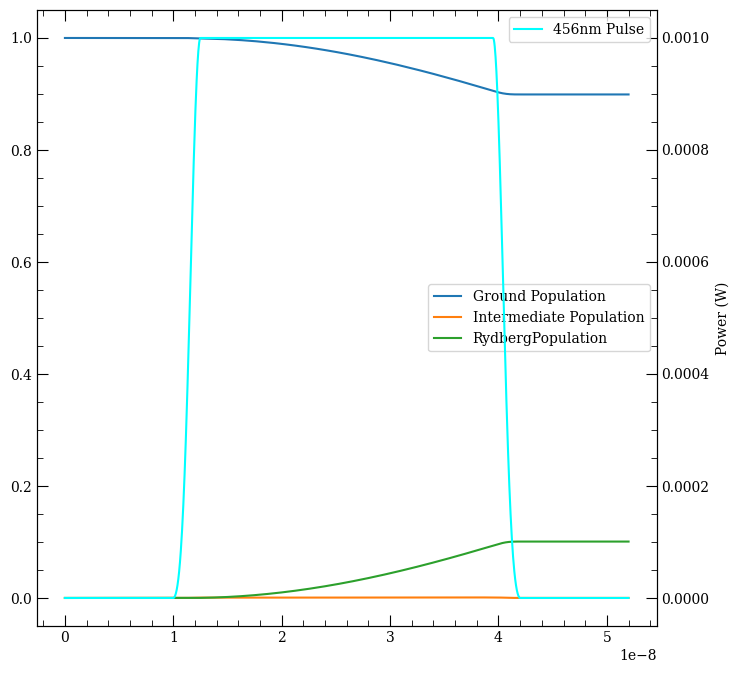

time: 10.2 s (started: 2024-10-16 13:48:09 -07:00)


In [16]:
rydnamics.plot_state_dynamics()

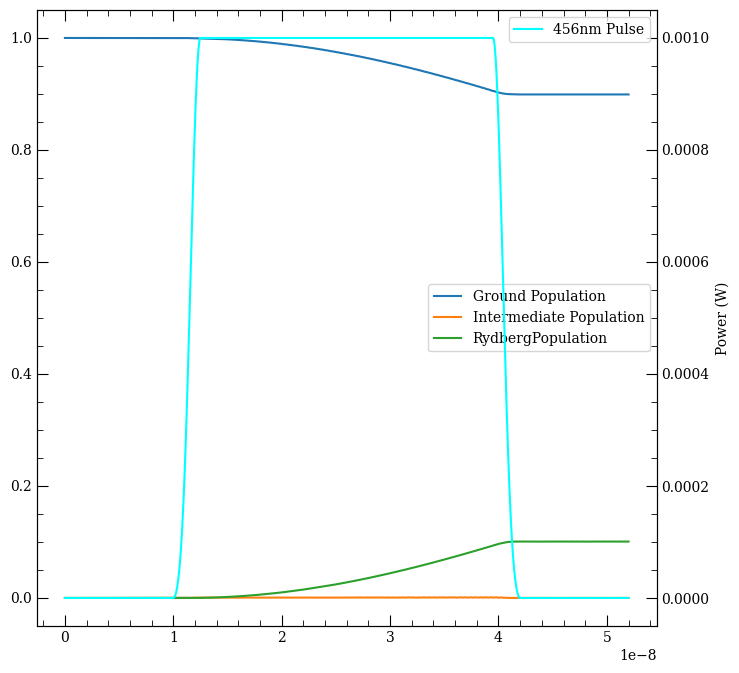

time: 9.85 s (started: 2024-10-16 13:48:19 -07:00)


In [17]:
rydnamics.plot_rho_dynamics()

At "optimal" detuning, do pi pulse durations match those calculated from theory as we change the 456nm peak power?

100%|███████████████████████████████████████████████████████████████| 20/20 [05:29<00:00, 16.49s/it]


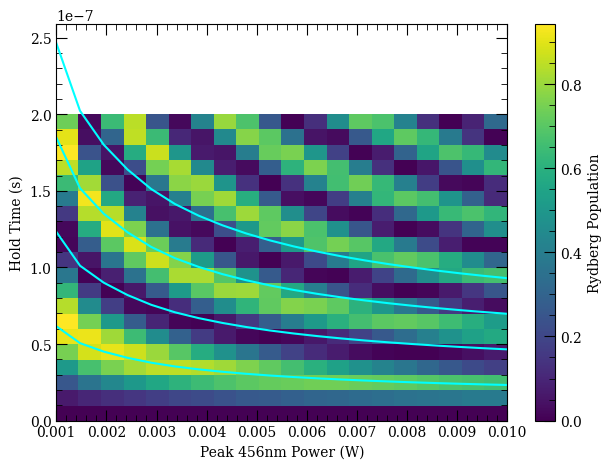

time: 5min 39s (started: 2024-10-16 13:48:29 -07:00)


In [18]:
rydnamics.plot_state_hold_vs_probe_power()

100%|███████████████████████████████████████████████████████████████| 20/20 [04:15<00:00, 12.80s/it]


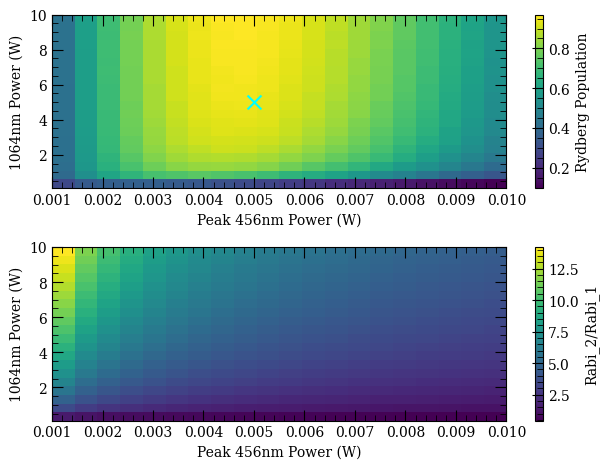

time: 4min 25s (started: 2024-10-16 13:54:08 -07:00)


In [19]:
rydnamics.plot_state_power_vs_power_fixed_pi()

Observe how the Rydberg conversion efficiency decreases as the laser powers move away from the point where the pi pulse duration was calculated (indicated by the X).

We have a lot more spare 1064nm power to play with than 456nm power (to keep the Rabi frequencies balanced). Let's see how mismatched the laser powers have to be before our "optimal" detuning is no longer close to optimal for a perfect (square) pi pulse at a fixed 456nm peak power.

100%|███████████████████████████████████████████████████████████████| 25/25 [06:34<00:00, 15.77s/it]


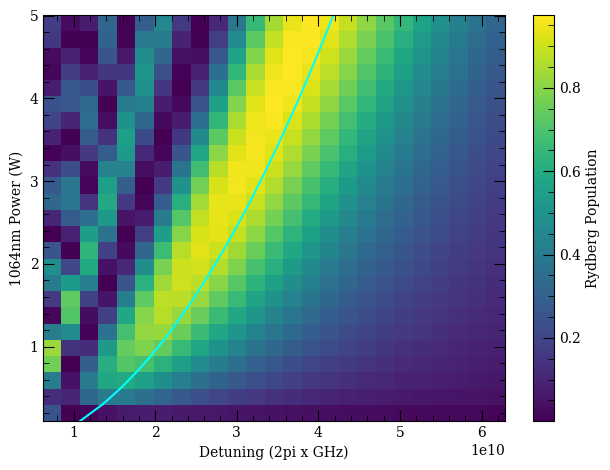

time: 6min 47s (started: 2024-10-16 13:58:34 -07:00)


In [20]:
coupling_powers = np.linspace(0.1, 5, 25)
detunings = np.linspace(2 * np.pi * 1e9, 2 * np.pi * 10e9, 25)
probe_peak_power = 5e-3
rydnamics.plot_state_couple_power_vs_detune(coupling_powers=coupling_powers, detunings=detunings,
									   probe_peak_power=probe_peak_power, duration=0)

What if we allow a finite turn on time? Since the pulse area is no longer equal to that of a pi pulse, there will be a shift of the proper detuning from "optimal". This illustrates how it is important to characterize AOM turn on/off times.

100%|███████████████████████████████████████████████████████████████| 25/25 [10:00<00:00, 24.02s/it]


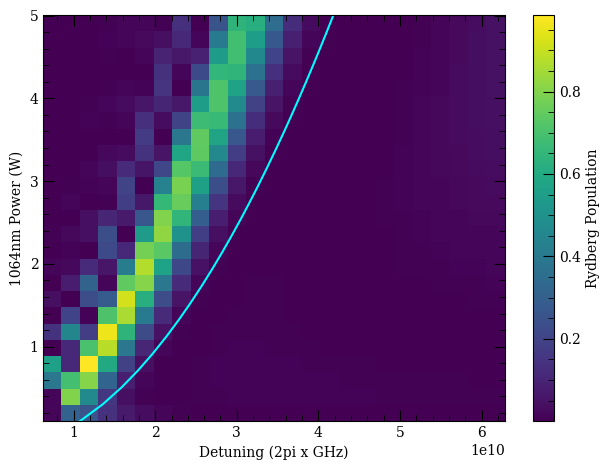

time: 10min 13s (started: 2024-10-16 14:05:22 -07:00)


In [21]:
coupling_powers = np.linspace(0.1, 5, 25)
detunings = np.linspace(2 * np.pi * 1e9, 2 * np.pi * 10e9, 25)
probe_peak_power = 5e-3
rydnamics.plot_state_couple_power_vs_detune(coupling_powers=coupling_powers, detunings=detunings,
									   probe_peak_power=probe_peak_power, duration=50e-9)

## Lindblad Master Equation

Now, let's add in the loss. We add in the jump operators to a fourth, heuristic loss channel.

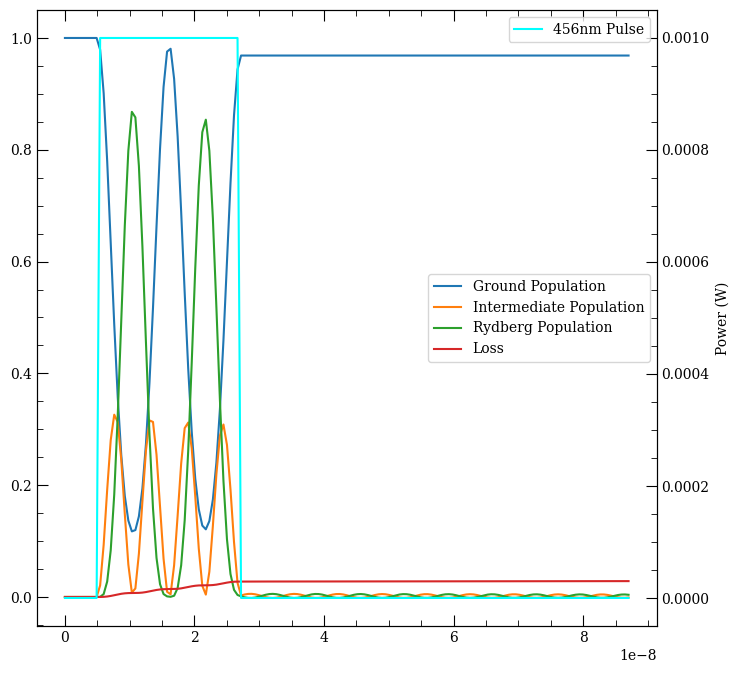

time: 9.73 s (started: 2024-10-16 14:15:35 -07:00)


In [22]:
rydnamics.plot_lindblad_dynamics()

Let's see how including the loss affects the choice of detuning with a perfect pi pulse at the "optimal" detuning.

100%|███████████████████████████████████████████████████████████████| 35/35 [14:38<00:00, 25.10s/it]


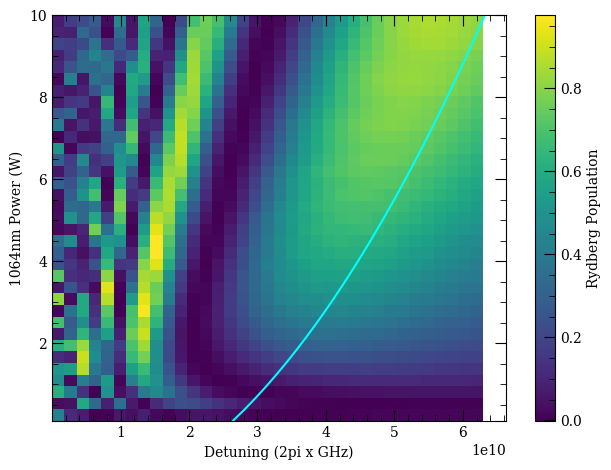

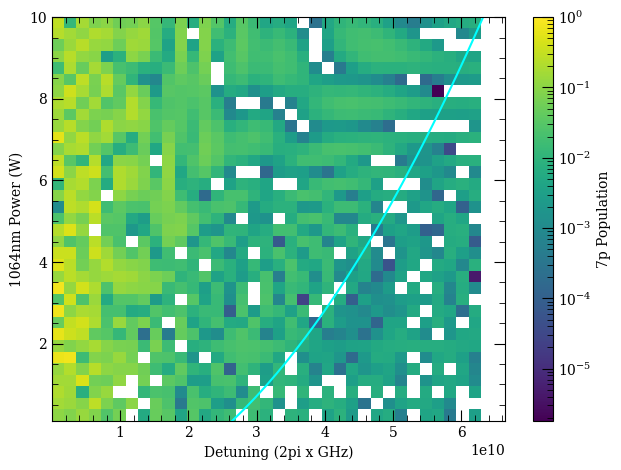

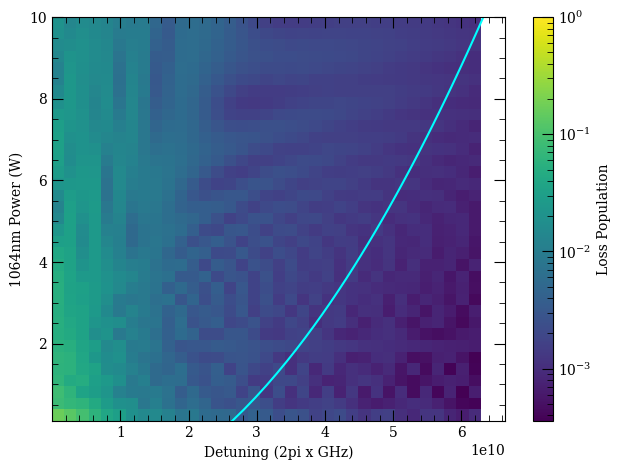

time: 14min 53s (started: 2024-10-16 14:15:45 -07:00)


In [23]:
coupling_powers = np.linspace(0.1, 10, 35)
detunings = np.linspace(2 * np.pi * 1e5, 2 * np.pi * 1e10, 35)
probe_peak_power = 40e-3
rydnamics.plot_lindblad_couple_power_vs_detune(coupling_powers=coupling_powers, detunings=detunings,
									   probe_peak_power=probe_peak_power)